In [46]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [48]:
# Download and unzip the dataset
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
!unzip -o cats_and_dogs.zip  # Use -o to overwrite files without prompt


Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_do

In [49]:
# Define the paths
PATH = 'cats_and_dogs'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get the number of files in each directory
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = sum([len(files) for r, d, files in os.walk(test_dir)])

print(f"Training images: {total_train}")
print(f"Validation images: {total_val}")
print(f"Test images: {total_test}")


Training images: 2001
Validation images: 1001
Test images: 51


In [50]:
# Variables for pre-processing and training
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Set up Image Data Generators
train_image_generator = ImageDataGenerator(rescale=1./255)  # Normalization
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Create data generators
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [54]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from PIL import UnidentifiedImageError

# Load test images from the directory
test_images = []
if total_test > 0:  # Check if there are images in the test directory
    for img_name in os.listdir(test_dir):
        # Filter out non-image files (like .DS_Store)
        if img_name.startswith('.') or not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        img_path = os.path.join(test_dir, img_name)
        try:
            img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
            img_array = img_to_array(img) / 255.0  # Normalize the image
            test_images.append(img_array)
        except (UnidentifiedImageError, FileNotFoundError) as e:
            print(f"Error loading image {img_name}: {e}")

test_images_array = np.array(test_images)  # Convert list to numpy array for prediction


In [56]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Define the model architecture
model = Sequential([
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Input layer with specified shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 2 for softmax if you have 2 classes
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Train the model
history = model.fit(train_data_gen, validation_data=val_data_gen, epochs=epochs)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 118s 7s/step - accuracy: 0.4908 - loss: 1.0302 - val_accuracy: 0.5000 - val_loss: 0.6910
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 108s 7s/step - accuracy: 0.5216 - loss: 0.6910 - val_accuracy: 0.5000 - val_loss: 0.6858
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 140s 7s/step - accuracy: 0.5659 - loss: 0.6861 - val_accuracy: 0.6590 - val_loss: 0.6673
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 143s 7s/step - accuracy: 0.6175 - loss: 0.6622 - val_accuracy: 0.5920 - val_loss: 0.6357
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 146s 7s/step - accuracy: 0.6649 - loss: 0.6182 - val_accuracy: 0.7070 - val_loss: 0.6065
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 137s 7s/step - accuracy: 0.7200 - loss: 0.5797 - val_accuracy: 0.7010 - val_loss: 0.5705
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step - accuracy: 0.7385 - loss: 0.5317 - val_accuracy: 0.6890 - val_loss: 0.5720
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 107s 7s/step - accuracy: 0.7437 - loss: 0.5202 - val_accuracy: 0.7340 - val_loss: 0.

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step


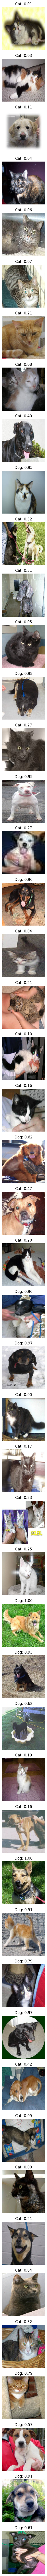

In [62]:
# 8
# Get predictions for test images
if test_images:
    probabilities = model.predict(test_images_array)
    probabilities = probabilities.flatten()

    # Plot test images with predictions
    def plot_images(images_arr, probabilities):
        fig, axes = plt.subplots(len(images_arr), 1, figsize=(5, len(images_arr) * 3))
        for img, probability, ax in zip(images_arr, probabilities, axes):
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{'Dog' if probability > 0.5 else 'Cat'}: {probability:.2f}")
        plt.show()

    plot_images(test_images_array, probabilities)


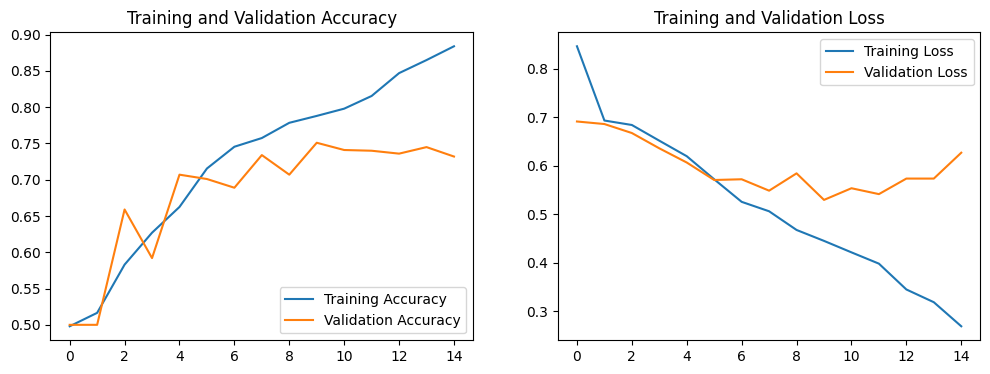

In [63]:
# Plot training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Removed directory: cats_and_dogs/train/dogs
Removed directory: cats_and_dogs/train/cats
Removed directory: cats_and_dogs/validation/dogs
Removed directory: cats_and_dogs


In [65]:
# 11
# Assuming `probabilities` is already defined from model predictions

answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

# Check predictions against the answers
for probability, answer in zip(probabilities, answers):
    if round(probability) == answer:
        correct += 1

percentage_identified = (correct / len(answers)) * 100
passed_challenge = percentage_identified >= 60

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


Your model correctly identified 60.0% of the images of cats and dogs.
You passed the challenge!
